# Neural & Behavioral Modeling - Week 1 (Exercises)
by Your Name (Your Email)

**%config IPCompleter.greedy=True**

This will enable completion on elements of lists, results of function calls, etc., but can be unsafe because the code is actually evaluated on TAB.

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Party Simulation (5 points)
This is a model of a cocktail party. The men and women at the party form groups. A party-goer becomes uncomfortable and switches groups if their current group has too many members of the opposite sex. What types of group result?

### 1.1 Insert your codes to complete the simulation (2 points)

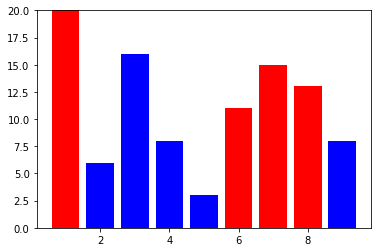

In [2]:
# Model parameters:
Ngroups=10
Npeople=100  
Tolerance=.2 # tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(2) # 0=woman; 1=man
        self.Ngroups = Ngroups       # number of groups ( from 0 to N-1)
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people) 
    sexes=[people[i].sex for i in range(Npeople)] #every people's sex
    groups=[people[i].group for i in range(Npeople)] #every people's group
    counts=zeros((max(groups)+1,max(sexes)+1)) # create a ([[0.,0.], ....]) 10 個
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1   # counts[每個人組別, 每個人性別]
    men_plus_women=sum(counts,1) # number of men and women in each group
    men_plus_women[men_plus_women==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/men_plus_women # proportion of women in each group
    proportions[:,1]=counts[:,1]/men_plus_women # proportion of men in each group
    return counts, proportions # size=group*sex

def plot_party(counts):
    x=arange(len(counts))+1 # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
Nhappy=0 # Number of happy people

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy = 0
    all_table, proportions = party_stats(people)
    for i in range(len(proportions)):
        for j in range(len(proportions[i])):
            if(proportions[i][1-j] > Tolerance):
                #all_table[i][j]裡的人要移動
                for x in range(Npeople):
                    if((people[x].group == i) and (people[x].sex == j)):
#                         print(people[x].group, ' ', people[x].sex)
                        people[x].leave()
                        break
                        
    all_table_2, proportions_2 = party_stats(people)
    for i in range(len(proportions_2)):
        for j in range(len(proportions_2[i])):
            if(proportions_2[i][1-j] < Tolerance):
                Nhappy += all_table_2[i][j]
                #all_table[i][j]裡的人要移動
    # Plot new results:
    counts, proportions=party_stats(people) # size=group*sex
    plot_party(counts)

### 1.2 Modify the three model parameters & discuss how each affects convergence of the simulation (2 points)

Write your answer here.

1. When Ngroups is bigger, the number of cycles will decrease.
2. When Npeople is bigger, the number of cycles will increase.
3. Tolerance has no obvious effect on the number of cycles(but must smaller than 0.5)

### 1.3 Discuss why the simulaiton leads to group polarization (1 point)

Because the tolerance is smaller than 0.5, the result of the simulation will be all-boy groups and all-girl groups.
If there are boys and girls in the same group, boys' tolerance for girls is x and girls' tolerance for boys is (1-x). It is impossible to have x and (1-x) both smaller than 0.25(or number under 0.5). Therefore, the final result will lead to group polarization. 

## 2 Understand Shunting Equation (5 points)

$\frac{dy}{dt}=-Ay+(B-y)*E-(y-C)*I$

### 2.1 Find its equilibrium by analytically solving $dy/dt=0$ (1 point)

Write your answer here with [LaTex](https://www.sharelatex.com/learn/Mathematical_expressions) formula

### 2.2 Use Euler integration to verify your answer in 2.1 with your own (A, B, C, E, I) constants (2 points)


In [7]:
# Write your simulation codes here

### 2.3 Combining math & if-then controls in numerical integrations (2 points)

Use Euler integration to plot $dy/dt=-y(t)+E$ where
$E=\begin{cases}
    1  &  \text{if } t<5\\
    0  &  \text{if } t>5
   \end{cases}$
for t=[0,10] & y(t=0)=0.

This is an example of time-varying rather than constant excitation.

In [4]:
# Write your simulation codes here